In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from scipy import stats
from scipy import stats
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
os.chdir('../../')

In [2]:
result_df = pd.read_csv('./data/final_result.csv')

In [3]:
result_df.head(3)

,random_state,split_fnum,configs,job_name,config_time,start_time,end_time,train_time,train_epoch,epoch_val_mIoU,avg_epoch_time,is_imbalance,split_strategy,resampling_strategy,do_copypaste,paste_by,test_mIoU,aeroplane,bicycle,bird,boat,bottle,bus,car,cat,...,tvmonitor_nz_pix,background_nz_pix,border_nz_pix,aeroplane_nz_prop,bicycle_nz_prop,bird_nz_prop,boat_nz_prop,bottle_nz_prop,bus_nz_prop,car_nz_prop,cat_nz_prop,chair_nz_prop,cow_nz_prop,diningtable_nz_prop,dog_nz_prop,horse_nz_prop,motorbike_nz_prop,person_nz_prop,pottedplant_nz_prop,sheep_nz_prop,sofa_nz_prop,train_nz_prop,tvmonitor_nz_prop,background_nz_prop,border_nz_prop
0,1,0,FALSE_random_x2_FALSE_none,jYQpo,2022-06-19 19:41:16,2022-06-19 19:41:26,2022-06-20 01:45:00,0 days 06:03:34,76,0.697371,0 days 00:04:47.026315789,False,random,x2,False,none,0.557497,0.652341,0.290290,0.635696,0.520608,0.347514,0.735243,0.436864,0.759840,...,29494.088235,124135.602740,9889.766866,0.120479,0.061706,0.117315,0.118679,0.096262,0.301848,0.157293,0.292609,0.112151,0.189372,0.230505,0.198306,0.194391,0.197004,0.155646,0.108732,0.197973,0.228286,0.268418,0.157874,0.691476,0.055353
1,1,0,FALSE_mskf_x2_FALSE_none,m7ltG,2022-06-20 01:45:00,2022-06-20 01:45:10,2022-06-20 08:07:31,0 days 06:22:21,80,0.709051,0 days 00:04:46.762500,False,mskf,x2,False,none,0.553489,0.649023,0.276470,0.653448,0.519311,0.347857,0.712158,0.492618,0.755708,...,29911.417910,124947.130993,10018.830914,0.120918,0.055538,0.114568,0.106267,0.091414,0.305744,0.155082,0.287179,0.113857,0.188486,0.241925,0.200665,0.200496,0.202002,0.150128,0.101752,0.190774,0.197239,0.264160,0.160539,0.694315,0.055992
2,1,0,TRUE_random_x2_FALSE_none,sKpWx,2022-06-20 08:07:31,2022-06-20 08:07:41,2022-06-20 12:26:32,0 days 04:18:51,79,0.708310,0 days 00:03:16.594936708,True,random,x2,False,none,0.523494,0.569173,0.238537,0.541929,0.508524,0.264707,0.725048,0.477476,0.671550,...,31235.136364,125013.505618,8647.516854,0.093482,0.085143,0.126022,0.121408,0.194825,0.307243,0.168325,0.292201,0.155681,0.185155,0.215470,0.207301,0.194250,0.199626,0.144454,0.139317,0.196613,0.262362,0.268418,0.167178,0.696699,0.048640


In [4]:
search_spaces = ['is_imbalance', 'split_strategy', 'resampling_strategy', 'do_copypaste', 'paste_by']

label_cols = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'background']


test_mIoU = result_df.groupby(search_spaces)[['test_mIoU']].agg(['mean', 'std', 'count', list])
test_mIoU = test_mIoU.reset_index()
test_mIoU.columns = search_spaces + ['mean', 'std', 'count','list']

test_mIoU['list'] = test_mIoU['list'].apply(lambda col: [f"{i:.4f}" for i in col])

test_mIoU = test_mIoU.rename(columns={'resampling_strategy': "sampling_strategy"})
search_spaces = ['is_imbalance', 'split_strategy', 'sampling_strategy', 'do_copypaste', 'paste_by']

In [5]:
test_mIoU.sort_values('mean', ascending=False)

,is_imbalance,split_strategy,sampling_strategy,do_copypaste,paste_by,mean,std,count,list
1,False,random,x2,False,none,0.555764,0.008171,5,"[0.5575, 0.5688, 0.5477, 0.5543, 0.5506]"
0,False,mskf,x2,False,none,0.555109,0.003390,5,"[0.5535, 0.5567, 0.5513, 0.5540, 0.5601]"
7,True,random,x2,True,cnt,0.531912,0.004774,5,"[0.5296, 0.5348, 0.5318, 0.5379, 0.5255]"
8,True,random,x2,True,performance,0.531783,0.002929,5,"[0.5302, 0.5365, 0.5307, 0.5326, 0.5289]"
4,True,mskf,cnt,True,performance,0.529656,0.005464,5,"[0.5312, 0.5312, 0.5201, 0.5316, 0.5341]"
3,True,mskf,cnt,True,cnt,0.528834,0.007287,5,"[0.5307, 0.5223, 0.5203, 0.5374, 0.5334]"
6,True,random,x2,False,none,0.518869,0.004718,5,"[0.5235, 0.5232, 0.5172, 0.5184, 0.5121]"
2,True,mskf,cnt,False,none,0.518855,0.003617,5,"[0.5237, 0.5203, 0.5138, 0.5181, 0.5183]"
5,True,mskf,x2,False,none,0.517678,0.005603,5,"[0.5204, 0.5090, 0.5177, 0.5171, 0.5242]"
9,True,skfprop,cluster,False,none,0.510055,0.005661,5,"[0.5126, 0.5023, 0.5135, 0.5159, 0.5060]"


In [6]:
test_mIoU.sort_values(search_spaces)

,is_imbalance,split_strategy,sampling_strategy,do_copypaste,paste_by,mean,std,count,list
0,False,mskf,x2,False,none,0.555109,0.003390,5,"[0.5535, 0.5567, 0.5513, 0.5540, 0.5601]"
1,False,random,x2,False,none,0.555764,0.008171,5,"[0.5575, 0.5688, 0.5477, 0.5543, 0.5506]"
2,True,mskf,cnt,False,none,0.518855,0.003617,5,"[0.5237, 0.5203, 0.5138, 0.5181, 0.5183]"
3,True,mskf,cnt,True,cnt,0.528834,0.007287,5,"[0.5307, 0.5223, 0.5203, 0.5374, 0.5334]"
4,True,mskf,cnt,True,performance,0.529656,0.005464,5,"[0.5312, 0.5312, 0.5201, 0.5316, 0.5341]"
5,True,mskf,x2,False,none,0.517678,0.005603,5,"[0.5204, 0.5090, 0.5177, 0.5171, 0.5242]"
6,True,random,x2,False,none,0.518869,0.004718,5,"[0.5235, 0.5232, 0.5172, 0.5184, 0.5121]"
7,True,random,x2,True,cnt,0.531912,0.004774,5,"[0.5296, 0.5348, 0.5318, 0.5379, 0.5255]"
8,True,random,x2,True,performance,0.531783,0.002929,5,"[0.5302, 0.5365, 0.5307, 0.5326, 0.5289]"
9,True,skfprop,cluster,False,none,0.510055,0.005661,5,"[0.5126, 0.5023, 0.5135, 0.5159, 0.5060]"


## compare train-val splitting method

In [7]:
imbalaced_mskf_x2 = test_mIoU[(test_mIoU.is_imbalance == False )& 
                          (test_mIoU.sampling_strategy=='x2')* 
                          (test_mIoU.do_copypaste == False)]
display(imbalaced_mskf_x2)
for i in range(2):
    print(imbalaced_mskf_x2['list'].iloc[i])


,is_imbalance,split_strategy,sampling_strategy,do_copypaste,paste_by,mean,std,count,list
0,False,mskf,x2,False,none,0.555109,0.003390,5,"[0.5535, 0.5567, 0.5513, 0.5540, 0.5601]"
1,False,random,x2,False,none,0.555764,0.008171,5,"[0.5575, 0.5688, 0.5477, 0.5543, 0.5506]"


['0.5535', '0.5567', '0.5513', '0.5540', '0.5601']
['0.5575', '0.5688', '0.5477', '0.5543', '0.5506']


In [8]:
imbalaced_mskf_x2 = test_mIoU[(test_mIoU.is_imbalance == True )& 
                          (test_mIoU.sampling_strategy=='x2')* 
                          (test_mIoU.do_copypaste == False)]
display(imbalaced_mskf_x2)
for i in range(2):
    print(imbalaced_mskf_x2['list'].iloc[i])


,is_imbalance,split_strategy,sampling_strategy,do_copypaste,paste_by,mean,std,count,list
5,True,mskf,x2,False,none,0.517678,0.005603,5,"[0.5204, 0.5090, 0.5177, 0.5171, 0.5242]"
6,True,random,x2,False,none,0.518869,0.004718,5,"[0.5235, 0.5232, 0.5172, 0.5184, 0.5121]"


['0.5204', '0.5090', '0.5177', '0.5171', '0.5242']
['0.5235', '0.5232', '0.5172', '0.5184', '0.5121']


## compare w/wo copy and paste result

In [9]:

is_imbalance = True
split_strategy = 'mskf'

compare_df = test_mIoU[(test_mIoU.is_imbalance == is_imbalance) & 
                       (test_mIoU.split_strategy == split_strategy)]

display(compare_df)
normal = compare_df[compare_df.paste_by == 'none']['list'].values[0]
copy_paste_by_cnt = compare_df[compare_df.paste_by == 'cnt']['list'].values[0]
copy_paste_by_performance = compare_df[compare_df.paste_by == 'performance']['list'].values[0]

print(stats.ranksums(normal, copy_paste_by_cnt))
print(stats.ranksums(normal, copy_paste_by_performance))
print(stats.ranksums(copy_paste_by_cnt, copy_paste_by_performance))


,is_imbalance,split_strategy,sampling_strategy,do_copypaste,paste_by,mean,std,count,list
2,True,mskf,cnt,False,none,0.518855,0.003617,5,"[0.5237, 0.5203, 0.5138, 0.5181, 0.5183]"
3,True,mskf,cnt,True,cnt,0.528834,0.007287,5,"[0.5307, 0.5223, 0.5203, 0.5374, 0.5334]"
4,True,mskf,cnt,True,performance,0.529656,0.005464,5,"[0.5312, 0.5312, 0.5201, 0.5316, 0.5341]"
5,True,mskf,x2,False,none,0.517678,0.005603,5,"[0.5204, 0.5090, 0.5177, 0.5171, 0.5242]"


RanksumsResult(statistic=-2.088931871468374, pvalue=0.0367138563627041)
RanksumsResult(statistic=-2.1933784650417927, pvalue=0.028280122568276955)
RanksumsResult(statistic=-0.1044465935734187, pvalue=0.9168149485280885)


In [10]:
is_imbalance = True
split_strategy = 'random'

compare_df = test_mIoU[(test_mIoU.is_imbalance == is_imbalance) & 
                       (test_mIoU.split_strategy == split_strategy)]

display(compare_df)
normal = compare_df[compare_df.paste_by == 'none']['list'].values[0]
copy_paste_by_cnt = compare_df[compare_df.paste_by == 'cnt']['list'].values[0]
copy_paste_by_performance = compare_df[compare_df.paste_by == 'performance']['list'].values[0]

print(stats.ranksums(normal, copy_paste_by_cnt))
print(stats.ranksums(normal, copy_paste_by_performance))
print(stats.ranksums(copy_paste_by_cnt, copy_paste_by_performance))


,is_imbalance,split_strategy,sampling_strategy,do_copypaste,paste_by,mean,std,count,list
6,True,random,x2,False,none,0.518869,0.004718,5,"[0.5235, 0.5232, 0.5172, 0.5184, 0.5121]"
7,True,random,x2,True,cnt,0.531912,0.004774,5,"[0.5296, 0.5348, 0.5318, 0.5379, 0.5255]"
8,True,random,x2,True,performance,0.531783,0.002929,5,"[0.5302, 0.5365, 0.5307, 0.5326, 0.5289]"


RanksumsResult(statistic=-2.6111648393354674, pvalue=0.009023438818080326)
RanksumsResult(statistic=-2.6111648393354674, pvalue=0.009023438818080326)
RanksumsResult(statistic=0.1044465935734187, pvalue=0.9168149485280885)


- compare on labels

In [11]:
imbalanced_labels =  "bird, cat, aeroplane, bicycle, bottle, chair".split(', ')
balaced_labels = list(set(label_cols) - set(imbalanced_labels))

prev_result = pd.read_csv('./data/previous_results.csv', index_col=0)
low_performance_labels = list(prev_result.mean(axis=1).sort_values()[:8].index)
print("low cnt labels : " , imbalanced_labels)
print("low perfromed labels:", low_performance_labels)

low cnt labels :  ['bird', 'cat', 'aeroplane', 'bicycle', 'bottle', 'chair']
low perfromed labels: ['chair', 'bicycle', 'sofa', 'pottedplant', 'diningtable', 'boat', 'tvmonitor', 'bottle']


In [12]:
random_cp_df = result_df[(result_df.is_imbalance == is_imbalance) & 
                    (result_df.split_strategy == split_strategy)][['random_state','paste_by', 'test_mIoU']+label_cols]
gb_random_cp_df = random_cp_df.groupby('paste_by')[['test_mIoU']+label_cols].agg(['mean', 'std'])
display(gb_random_cp_df.T)


paste_by               cnt      none  performance
test_mIoU   mean  0.531912  0.518869     0.531783
            std   0.004774  0.004718     0.002929
aeroplane   mean  0.601056  0.545740     0.548969
            std   0.018196  0.020776     0.018811
bicycle     mean  0.256784  0.212530     0.253544
            std   0.006217  0.029559     0.008989
bird        mean  0.554669  0.525782     0.533152
            std   0.025552  0.019748     0.015114
boat        mean  0.502715  0.511430     0.529475
            std   0.013472  0.009249     0.009278
bottle      mean  0.333971  0.274431     0.326867
            std   0.014919  0.022595     0.020057
bus         mean  0.724619  0.710647     0.726580
            std   0.005957  0.022362     0.012014
car         mean  0.467937  0.471677     0.476222
            std   0.019363  0.007488     0.004920
cat         mean  0.673928  0.663291     0.653660
            std   0.024040  0.006230     0.015306
chair       mean  0.104954  0.049116     0.097984
            std   0.013831  0.014239     0.009865
cow         mean  0.679059  0.704459     0.676347
            std   0.013289  0.029738     0.010328
diningtable mean  0.394572  0.386190     0.389443
            std   0.026353  0.040067     0.030337
dog         mean  0.681950  0.704280     0.697141
            std   0.011304  0.015269     0.018233
horse       mean  0.625286  0.633196     0.647493
            std   0.021131  0.021986     0.017072
motorbike   mean  0.630751  0.650438     0.645632
            std   0.016057  0.010620     0.008220
person      mean  0.554687  0.553209     0.556976
            std   0.013090  0.000777     0.009260
pottedplant mean  0.269211  0.245455     0.290034
            std   0.008316  0.017357     0.013320
sheep       mean  0.619132  0.602148     0.617863
            std   0.024432  0.012684     0.033307
sofa        mean  0.434056  0.402915     0.430945
            std   0.027724  0.032731     0.010479
train       mean  0.725580  0.711910     0.728808
            std   0.009673  0.013026     0.013263
tvmonitor   mean  0.464499  0.467336     0.471367
            std   0.014393  0.005741     0.017467
background  mean  0.870729  0.870059     0.868934
            std   0.004623  0.002078     0.003601

In [13]:
display(gb_random_cp_df)

test_mIoU           aeroplane             bicycle            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.531912  0.004774  0.601056  0.018196  0.256784  0.006217   
none         0.518869  0.004718  0.545740  0.020776  0.212530  0.029559   
performance  0.531783  0.002929  0.548969  0.018811  0.253544  0.008989   

                 bird                boat              bottle            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.554669  0.025552  0.502715  0.013472  0.333971  0.014919   
none         0.525782  0.019748  0.511430  0.009249  0.274431  0.022595   
performance  0.533152  0.015114  0.529475  0.009278  0.326867  0.020057   

                  bus                 car                 cat            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.724619  0.005957  0.467937  0.019363  0.673928  0.024040   
none         0.710647  0.022362  0.471677  0.007488  0.663291  0.006230   
performance  0.726580  0.012014  0.476222  0.004920  0.653660  0.015306   

                chair                 cow           diningtable            \
                 mean       std      mean       std        mean       std   
paste_by                                                                    
cnt          0.104954  0.013831  0.679059  0.013289    0.394572  0.026353   
none         0.049116  0.014239  0.704459  0.029738    0.386190  0.040067   
performance  0.097984  0.009865  0.676347  0.010328    0.389443  0.030337   

                  dog               horse           motorbike            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.681950  0.011304  0.625286  0.021131  0.630751  0.016057   
none         0.704280  0.015269  0.633196  0.021986  0.650438  0.010620   
performance  0.697141  0.018233  0.647493  0.017072  0.645632  0.008220   

               person           pottedplant               sheep            \
                 mean       std        mean       std      mean       std   
paste_by                                                                    
cnt          0.554687  0.013090    0.269211  0.008316  0.619132  0.024432   
none         0.553209  0.000777    0.245455  0.017357  0.602148  0.012684   
performance  0.556976  0.009260    0.290034  0.013320  0.617863  0.033307   

                 sofa               train           tvmonitor            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.434056  0.027724  0.725580  0.009673  0.464499  0.014393   
none         0.402915  0.032731  0.711910  0.013026  0.467336  0.005741   
performance  0.430945  0.010479  0.728808  0.013263  0.471367  0.017467   

            background            
                  mean       std  
paste_by                          
cnt           0.870729  0.004623  
none          0.870059  0.002078  
performance   0.868934  0.003601

In [14]:
l0 = gb_random_cp_df.columns.get_level_values(0)
l0 = l0.isin(imbalanced_labels)
cur_df = gb_random_cp_df[gb_random_cp_df.columns[l0]].iloc[:2]
display(cur_df)
l1 = cur_df.columns.get_level_values(1) == 'mean'
mean_Iou_diff = np.mean(cur_df[cur_df.columns[l1]].iloc[0] - cur_df[cur_df.columns[l1]].iloc[1])
print(f"average performance gained on imbalanced labels: {mean_Iou_diff:.5f}")

aeroplane             bicycle                bird            \
              mean       std      mean       std      mean       std   
paste_by                                                               
cnt       0.601056  0.018196  0.256784  0.006217  0.554669  0.025552   
none      0.545740  0.020776  0.212530  0.029559  0.525782  0.019748   

            bottle                 cat              chair            
              mean       std      mean      std      mean       std  
paste_by                                                             
cnt       0.333971  0.014919  0.673928  0.02404  0.104954  0.013831  
none      0.274431  0.022595  0.663291  0.00623  0.049116  0.014239

average performance gained on imbalanced labels: 0.04241


In [15]:
l0 = gb_random_cp_df.columns.get_level_values(0)
l0 = l0.isin(list(set(label_cols) - set(imbalanced_labels)))
cur_df = gb_random_cp_df[gb_random_cp_df.columns[l0]].iloc[:2]
display(cur_df)
l1 = cur_df.columns.get_level_values(1) == 'mean'
mean_Iou_diff = np.mean(cur_df[cur_df.columns[l1]].iloc[0] - cur_df[cur_df.columns[l1]].iloc[1])
print(f"average performance gained on balanced labels: {mean_Iou_diff:.5f}")

boat                 bus                 car            \
              mean       std      mean       std      mean       std   
paste_by                                                               
cnt       0.502715  0.013472  0.724619  0.005957  0.467937  0.019363   
none      0.511430  0.009249  0.710647  0.022362  0.471677  0.007488   

               cow           diningtable                dog            \
              mean       std        mean       std     mean       std   
paste_by                                                                
cnt       0.679059  0.013289    0.394572  0.026353  0.68195  0.011304   
none      0.704459  0.029738    0.386190  0.040067  0.70428  0.015269   

             horse           motorbike              person            \
              mean       std      mean       std      mean       std   
paste_by                                                               
cnt       0.625286  0.021131  0.630751  0.016057  0.554687  0.013090   
none      0.633196  0.021986  0.650438  0.010620  0.553209  0.000777   

         pottedplant               sheep                sofa            \
                mean       std      mean       std      mean       std   
paste_by                                                                 
cnt         0.269211  0.008316  0.619132  0.024432  0.434056  0.027724   
none        0.245455  0.017357  0.602148  0.012684  0.402915  0.032731   

            train           tvmonitor           background            
             mean       std      mean       std       mean       std  
paste_by                                                              
cnt       0.72558  0.009673  0.464499  0.014393   0.870729  0.004623  
none      0.71191  0.013026  0.467336  0.005741   0.870059  0.002078

average performance gained on balanced labels: 0.00130


In [16]:
l0 = gb_random_cp_df.columns.get_level_values(0)
l0 = l0.isin(low_performance_labels)
cur_df = gb_random_cp_df[gb_random_cp_df.columns[l0]].iloc[1:]
display(cur_df)

l1 = cur_df.columns.get_level_values(1) == 'mean'
mean_Iou_diff = np.mean(cur_df[cur_df.columns[l1]].iloc[1] - cur_df[cur_df.columns[l1]].iloc[0])
print(f"average performance gained on low perfromance labels: {mean_Iou_diff:.5f}")

bicycle                boat              bottle            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
none         0.212530  0.029559  0.511430  0.009249  0.274431  0.022595   
performance  0.253544  0.008989  0.529475  0.009278  0.326867  0.020057   

                chair           diningtable           pottedplant            \
                 mean       std        mean       std        mean       std   
paste_by                                                                      
none         0.049116  0.014239    0.386190  0.040067    0.245455  0.017357   
performance  0.097984  0.009865    0.389443  0.030337    0.290034  0.013320   

                 sofa           tvmonitor            
                 mean       std      mean       std  
paste_by                                             
none         0.402915  0.032731  0.467336  0.005741  
performance  0.430945  0.010479  0.471367  0.017467

average performance gained on low perfromance labels: 0.03003


In [17]:
l0 = gb_random_cp_df.columns.get_level_values(0)
l0 = l0.isin(list(set(label_cols) - set(low_performance_labels)))
cur_df = gb_random_cp_df[gb_random_cp_df.columns[l0]].iloc[1:]
display(cur_df)

l1 = cur_df.columns.get_level_values(1) == 'mean'
mean_Iou_diff = np.mean(cur_df[cur_df.columns[l1]].iloc[1] - cur_df[cur_df.columns[l1]].iloc[0])
print(f"average performance gained on normal perfromance labels: {mean_Iou_diff:.5f}")

aeroplane                bird                 bus            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
none         0.545740  0.020776  0.525782  0.019748  0.710647  0.022362   
performance  0.548969  0.018811  0.533152  0.015114  0.726580  0.012014   

                  car                 cat                 cow            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
none         0.471677  0.007488  0.663291  0.006230  0.704459  0.029738   
performance  0.476222  0.004920  0.653660  0.015306  0.676347  0.010328   

                  dog               horse           motorbike           \
                 mean       std      mean       std      mean      std   
paste_by                                                                 
none         0.704280  0.015269  0.633196  0.021986  0.650438  0.01062   
performance  0.697141  0.018233  0.647493  0.017072  0.645632  0.00822   

               person               sheep               train            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
none         0.553209  0.000777  0.602148  0.012684  0.711910  0.013026   
performance  0.556976  0.009260  0.617863  0.033307  0.728808  0.013263   

            background            
                  mean       std  
paste_by                          
none          0.870059  0.002078  
performance   0.868934  0.003601

average performance gained on normal perfromance labels: 0.00238


In [18]:
l0 = gb_random_cp_df.columns.get_level_values(0)
l0 = (~l0.isin(low_performance_labels)) & (~l0.isin(imbalanced_labels))
display(gb_random_cp_df[gb_random_cp_df.columns[l0]])

test_mIoU                 bus                 car            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.531912  0.004774  0.724619  0.005957  0.467937  0.019363   
none         0.518869  0.004718  0.710647  0.022362  0.471677  0.007488   
performance  0.531783  0.002929  0.726580  0.012014  0.476222  0.004920   

                  cow                 dog               horse            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.679059  0.013289  0.681950  0.011304  0.625286  0.021131   
none         0.704459  0.029738  0.704280  0.015269  0.633196  0.021986   
performance  0.676347  0.010328  0.697141  0.018233  0.647493  0.017072   

            motorbike              person               sheep            \
                 mean       std      mean       std      mean       std   
paste_by                                                                  
cnt          0.630751  0.016057  0.554687  0.013090  0.619132  0.024432   
none         0.650438  0.010620  0.553209  0.000777  0.602148  0.012684   
performance  0.645632  0.008220  0.556976  0.009260  0.617863  0.033307   

                train           background            
                 mean       std       mean       std  
paste_by                                              
cnt          0.725580  0.009673   0.870729  0.004623  
none         0.711910  0.013026   0.870059  0.002078  
performance  0.728808  0.013263   0.868934  0.003601

## check correlation with data stats and result

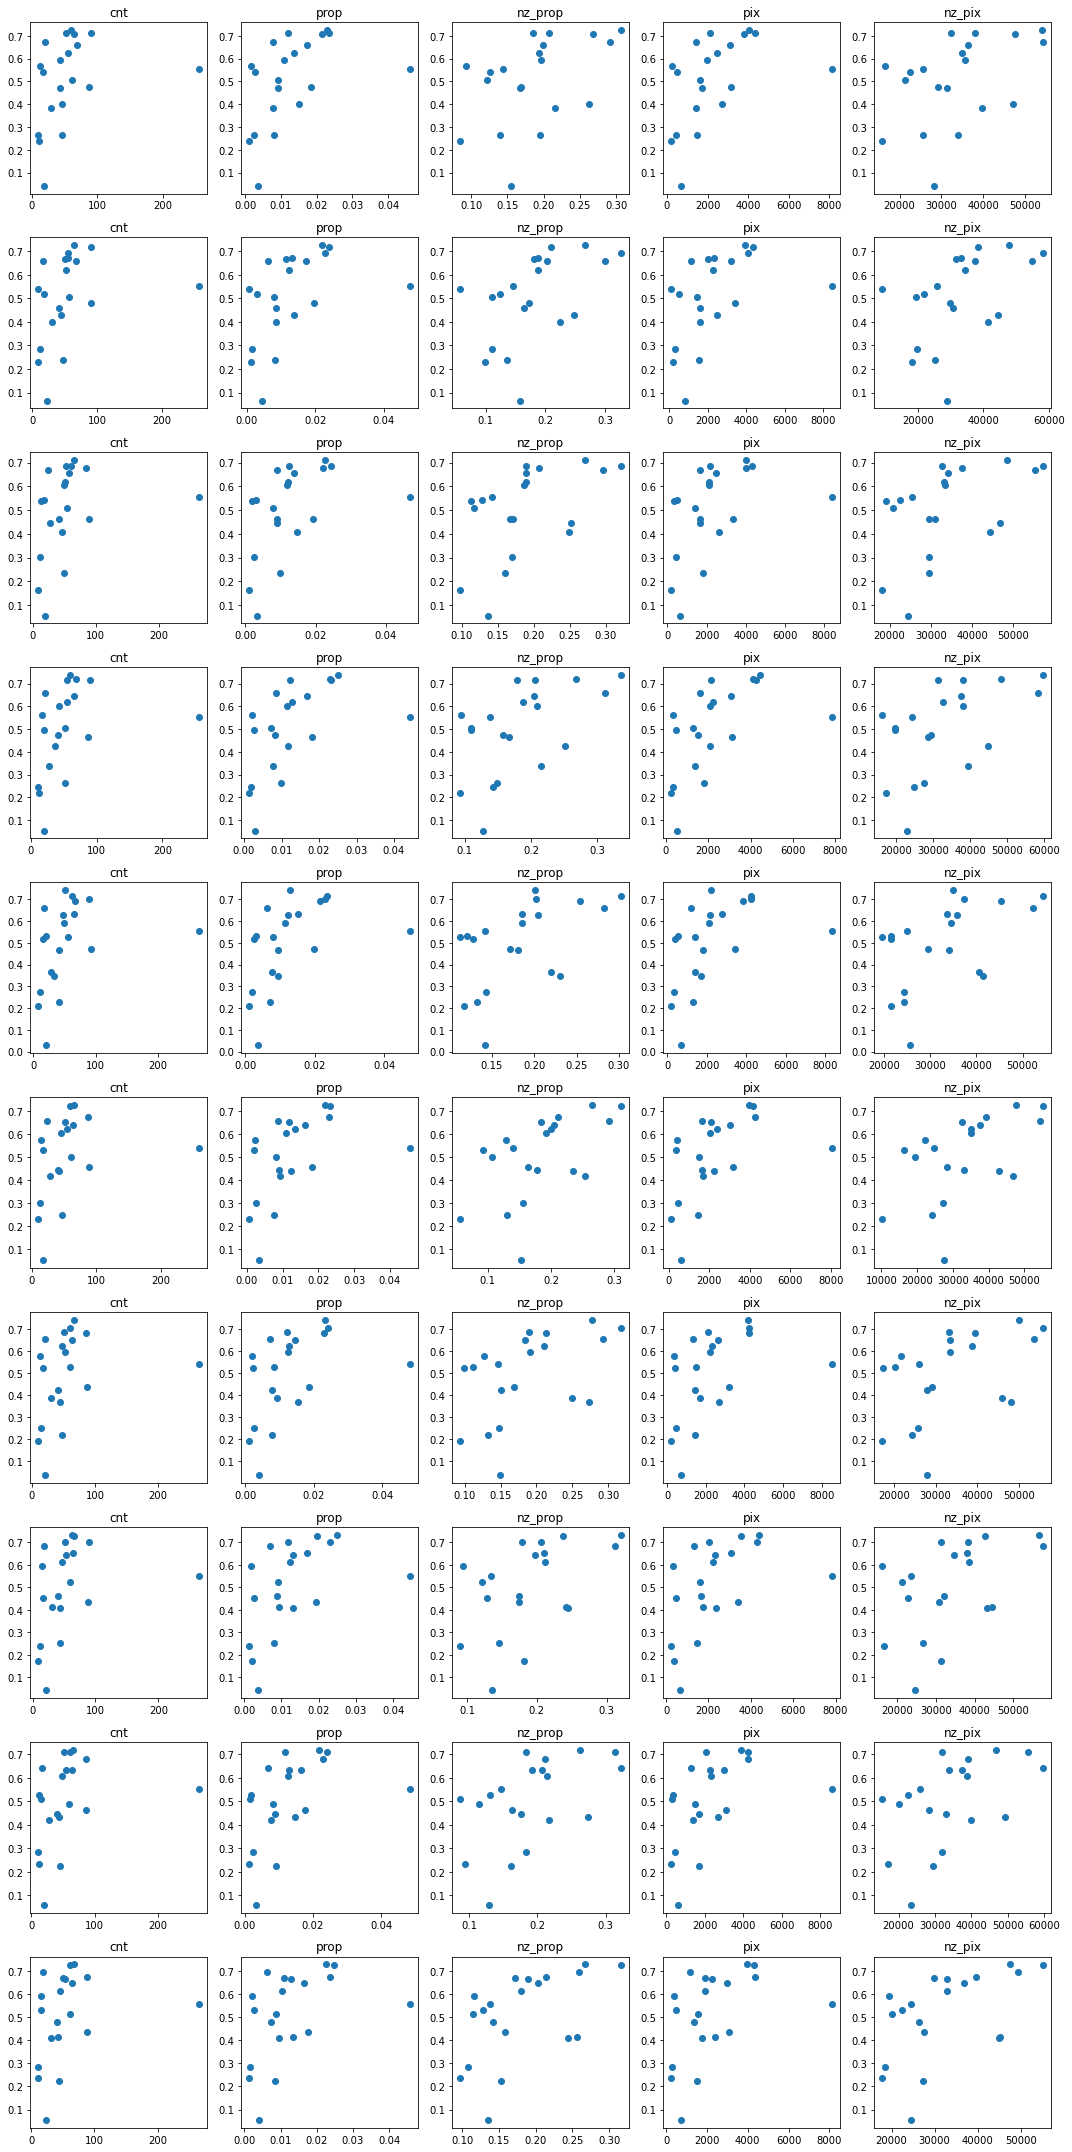

In [19]:
check_corr_df = result_df[(result_df.configs == 'TRUE_random_x2_FALSE_none') |
                          (result_df.configs == 'TRUE_mskf_x2_FALSE_none')]


label_cols = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'background']

label_cols = [i for i in label_cols if i != 'background']

cnt_cols = [f'{i}_cnt' for i in label_cols]
prop_cols = [f'{i}_prop' for i in label_cols]
nz_prop_cols = [f'{i}_nz_prop' for i in label_cols]
pixel_cols = [f'{i}_pix' for i in label_cols]
nz_pixel_cols = [f'{i}_nz_pix' for i in label_cols]


cols_group = [cnt_cols, 
                prop_cols, 
                nz_prop_cols, 
                pixel_cols,
                nz_pixel_cols]

result = []

dummy_cnt = 1

fig = plt.figure(figsize=(15, 30))

for i in range(len(check_corr_df)):
    for cols in cols_group:
        col_name = '_'.join(cols[0].split('_')[1:])
        x = check_corr_df[cols].iloc[i].values
        y = check_corr_df[label_cols].iloc[i].values
        rho_p, pval_p = stats.pearsonr(x,y)
        rho_s, pval_s = stats.spearmanr(x,y)
        rho_k, pval_k = stats.kendalltau(x,y)
        result.append([col_name, i, rho_p, pval_p, rho_s, pval_s, rho_k, pval_k, x, y ])
        
        ax = fig.add_subplot(10,5,dummy_cnt)
        ax.scatter(x,y)
        ax.set_title(col_name)
        
        dummy_cnt +=1
plt.tight_layout()

In [20]:
corr_df = pd.DataFrame(result)
corr_df.columns = ['stat_name', 'random_state', 'rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k', 'class_data_stat', 'class_IoU']
corr_df.groupby('stat_name')[['rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k']].mean()




,rho_p,pval_p,rho_s,pval_s,rho_k,pval_k
stat_name,,,,,,
cnt,0.279877,0.233335,0.542465,0.014885,0.387738,0.018664
nz_pix,0.493448,0.028946,0.540451,0.016630,0.391579,0.019190
nz_prop,0.508127,0.023909,0.552180,0.014080,0.404211,0.017220
pix,0.466955,0.039382,0.598045,0.006541,0.434737,0.009179
prop,0.463879,0.040657,0.599699,0.006315,0.441053,0.007752


## without person class

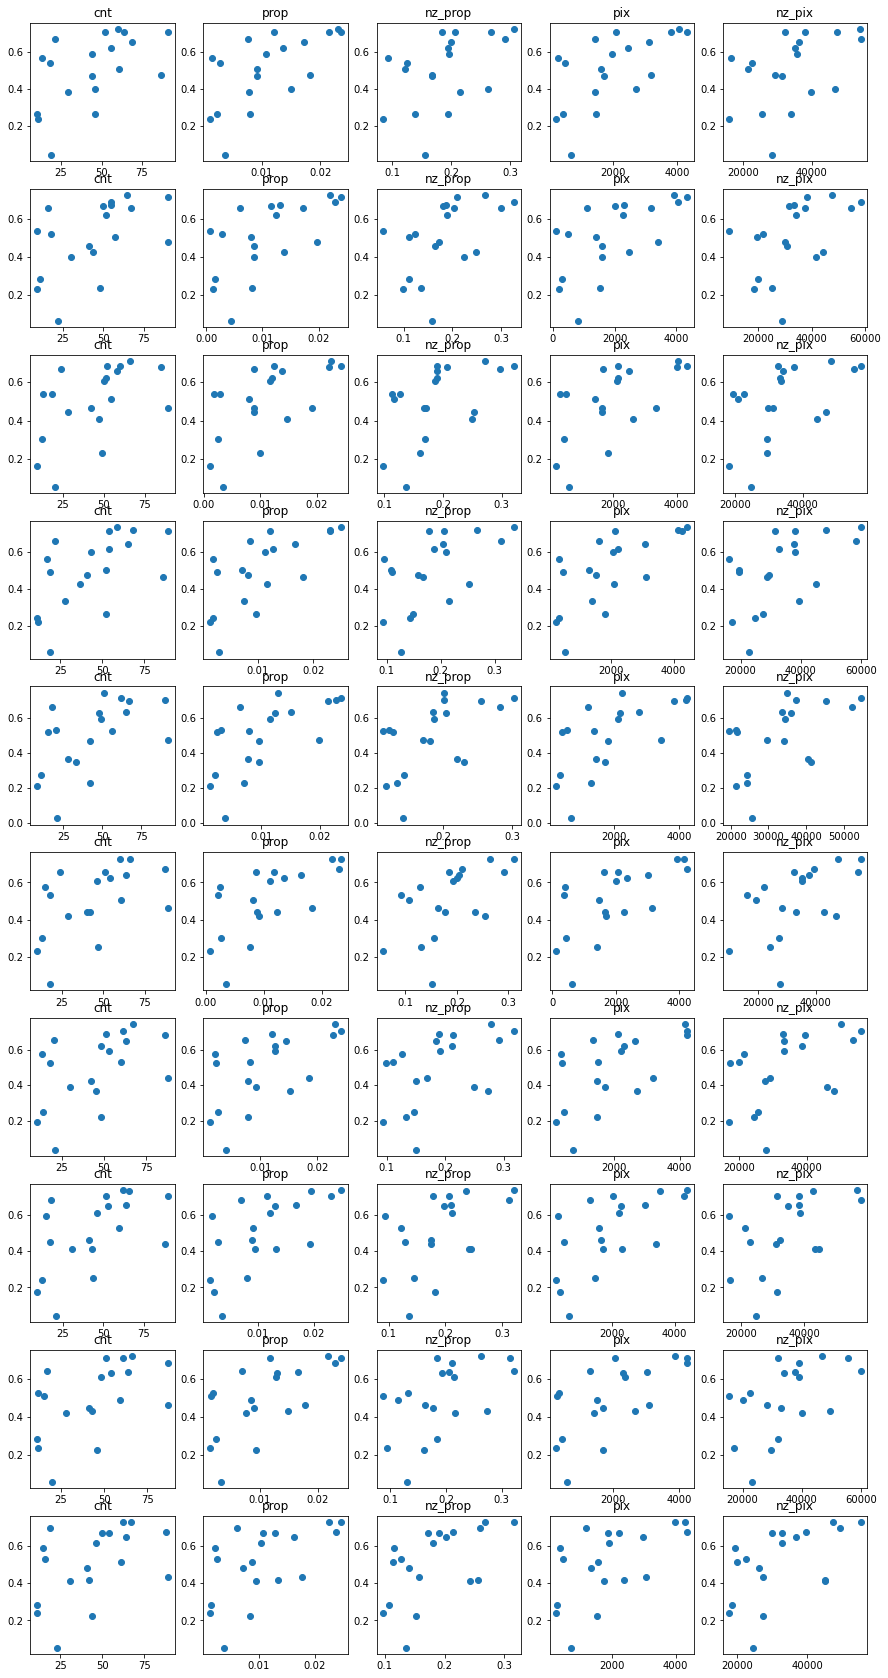

In [21]:
label_cols = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'background']

label_cols = [i for i in label_cols if (i != 'background') and (i != 'person')]

cnt_cols = [f'{i}_cnt' for i in label_cols]

prop_cols = [f'{i}_prop' for i in label_cols]

nz_prop_cols = [f'{i}_nz_prop' for i in label_cols]

pixel_cols = [f'{i}_pix' for i in label_cols]

nz_pixel_cols = [f'{i}_nz_pix' for i in label_cols]


cols_group = [cnt_cols, 
                prop_cols, 
                nz_prop_cols, 
                pixel_cols,
                nz_pixel_cols]

result = []

dummy_cnt = 1

fig = plt.figure(figsize=(15, 30))


for i in range(len(check_corr_df)):
    for cols in cols_group:
        col_name = '_'.join(cols[0].split('_')[1:])
        x = check_corr_df[cols].iloc[i].values
        y = check_corr_df[label_cols].iloc[i].values
        rho_p, pval_p = stats.pearsonr(x,y)
        rho_s, pval_s = stats.spearmanr(x,y)
        rho_k, pval_k = stats.kendalltau(x,y)
        result.append([col_name, i, rho_p, pval_p, rho_s, pval_s, rho_k, pval_k, x, y ])
        
        ax = fig.add_subplot(10,5,dummy_cnt)
        ax.scatter(x,y)
        ax.set_title(col_name)
        
        dummy_cnt +=1

In [22]:
corr_df = pd.DataFrame(result)
corr_df.columns = ['stat_name', 'random_state', 'rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k', 'class_data_stat', 'class_IoU']
corr_df.groupby('stat_name')[['rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k']].mean()




,rho_p,pval_p,rho_s,pval_s,rho_k,pval_k
stat_name,,,,,,
cnt,0.513633,0.026206,0.577283,0.010912,0.420426,0.013432
nz_pix,0.511399,0.027088,0.556842,0.015761,0.400000,0.020388
nz_prop,0.525594,0.022530,0.569123,0.013208,0.414035,0.017912
pix,0.628897,0.004482,0.633333,0.004663,0.472515,0.006043
prop,0.628862,0.004480,0.635263,0.004472,0.479532,0.004975


In [23]:
result_df.configs.unique()

array(['FALSE_random_x2_FALSE_none', 'FALSE_mskf_x2_FALSE_none',
       'TRUE_random_x2_FALSE_none', 'TRUE_mskf_cnt_FALSE_none',
       'TRUE_skf_prop_cluster_FALSE_none', 'TRUE_random_x2_TRUE_cnt',
       'TRUE_random_x2_TRUE_performance', 'TRUE_mskf_cnt_TRUE_cnt',
       'TRUE_mskf_cnt_TRUE_performance', 'TRUE_mskf_x2_FALSE_none'],
      dtype=object)

## when data is less imbalanced on label frequency

,rho_p,pval_p,rho_s,pval_s,rho_k,pval_k
stat_name,,,,,,
cnt,-0.005792,0.944580,-0.090591,0.638387,-0.060005,0.647777
nz_pix,0.635847,0.002940,0.636842,0.003654,0.464211,0.005113
nz_prop,0.644763,0.002451,0.641203,0.003018,0.463158,0.004897
pix,0.294215,0.210352,0.431729,0.057996,0.297895,0.071803
prop,0.294822,0.209123,0.453534,0.045396,0.322105,0.053360


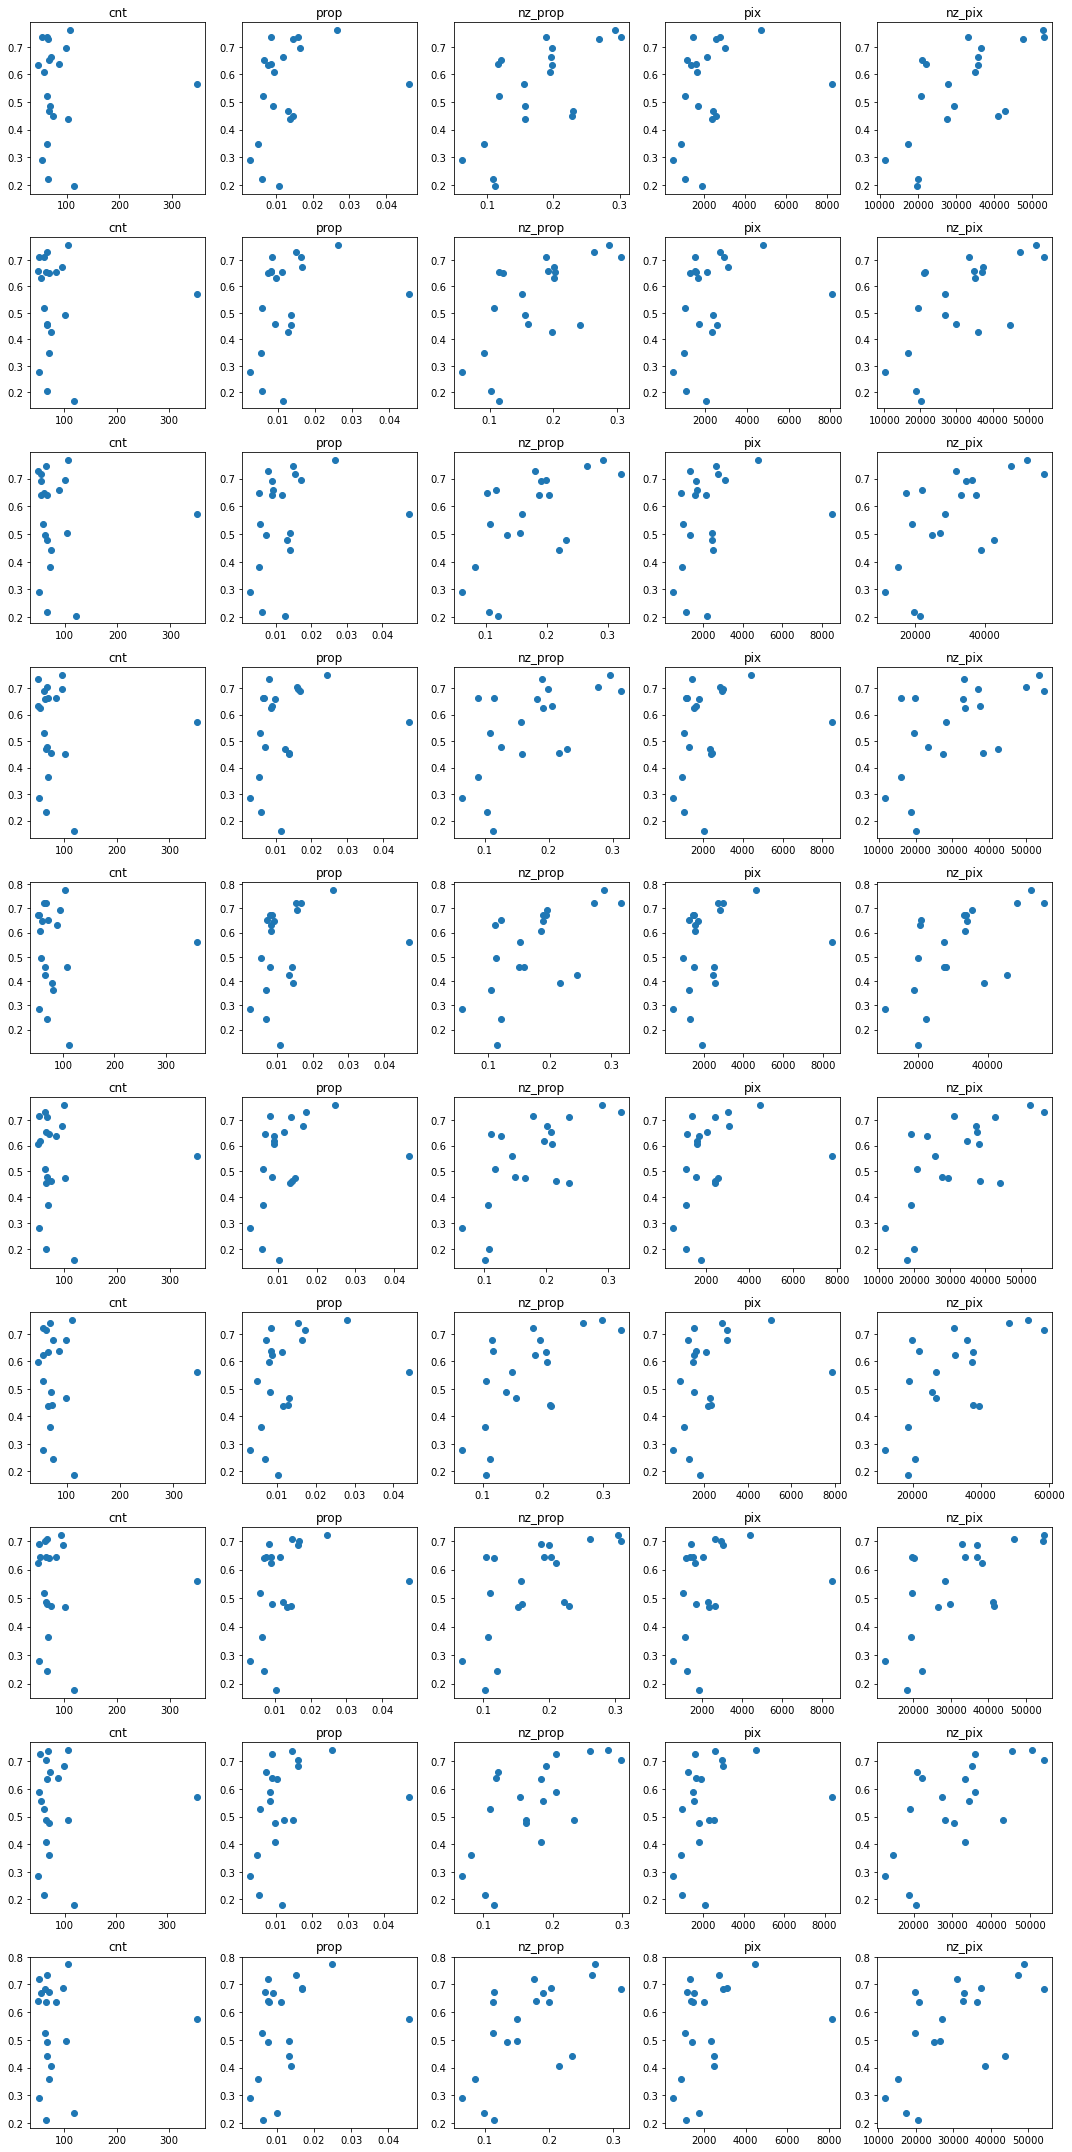

In [24]:
check_corr_df = result_df[(result_df.configs == 'FALSE_random_x2_FALSE_none') |
                          (result_df.configs == 'FALSE_mskf_x2_FALSE_none')]


label_cols = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'background']

label_cols = [i for i in label_cols if i != 'background']

cnt_cols = [f'{i}_cnt' for i in label_cols]
prop_cols = [f'{i}_prop' for i in label_cols]
nz_prop_cols = [f'{i}_nz_prop' for i in label_cols]
pixel_cols = [f'{i}_pix' for i in label_cols]
nz_pixel_cols = [f'{i}_nz_pix' for i in label_cols]


cols_group = [cnt_cols, 
                prop_cols, 
                nz_prop_cols, 
                pixel_cols,
                nz_pixel_cols]

result = []

dummy_cnt = 1

fig = plt.figure(figsize=(15, 30))

for i in range(len(check_corr_df)):
    for cols in cols_group:
        col_name = '_'.join(cols[0].split('_')[1:])
        x = check_corr_df[cols].iloc[i].values
        y = check_corr_df[label_cols].iloc[i].values
        rho_p, pval_p = stats.pearsonr(x,y)
        rho_s, pval_s = stats.spearmanr(x,y)
        rho_k, pval_k = stats.kendalltau(x,y)
        result.append([col_name, i, rho_p, pval_p, rho_s, pval_s, rho_k, pval_k, x, y ])
        
        ax = fig.add_subplot(10,5,dummy_cnt)
        ax.scatter(x,y)
        ax.set_title(col_name)
        
        dummy_cnt +=1
plt.tight_layout()

corr_df = pd.DataFrame(result)
corr_df.columns = ['stat_name', 'random_state', 'rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k', 'class_data_stat', 'class_IoU']
display(corr_df.groupby('stat_name')[['rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k']].mean())




,rho_p,pval_p,rho_s,pval_s,rho_k,pval_k
stat_name,,,,,,
cnt,-0.141519,0.571226,-0.086559,0.662396,-0.062010,0.647646
nz_pix,0.640645,0.003543,0.642105,0.004661,0.464327,0.007861
nz_prop,0.649393,0.002979,0.649474,0.003606,0.466667,0.006678
pix,0.477226,0.040879,0.480175,0.037866,0.335673,0.048057
prop,0.480818,0.039128,0.503158,0.028779,0.362573,0.034329


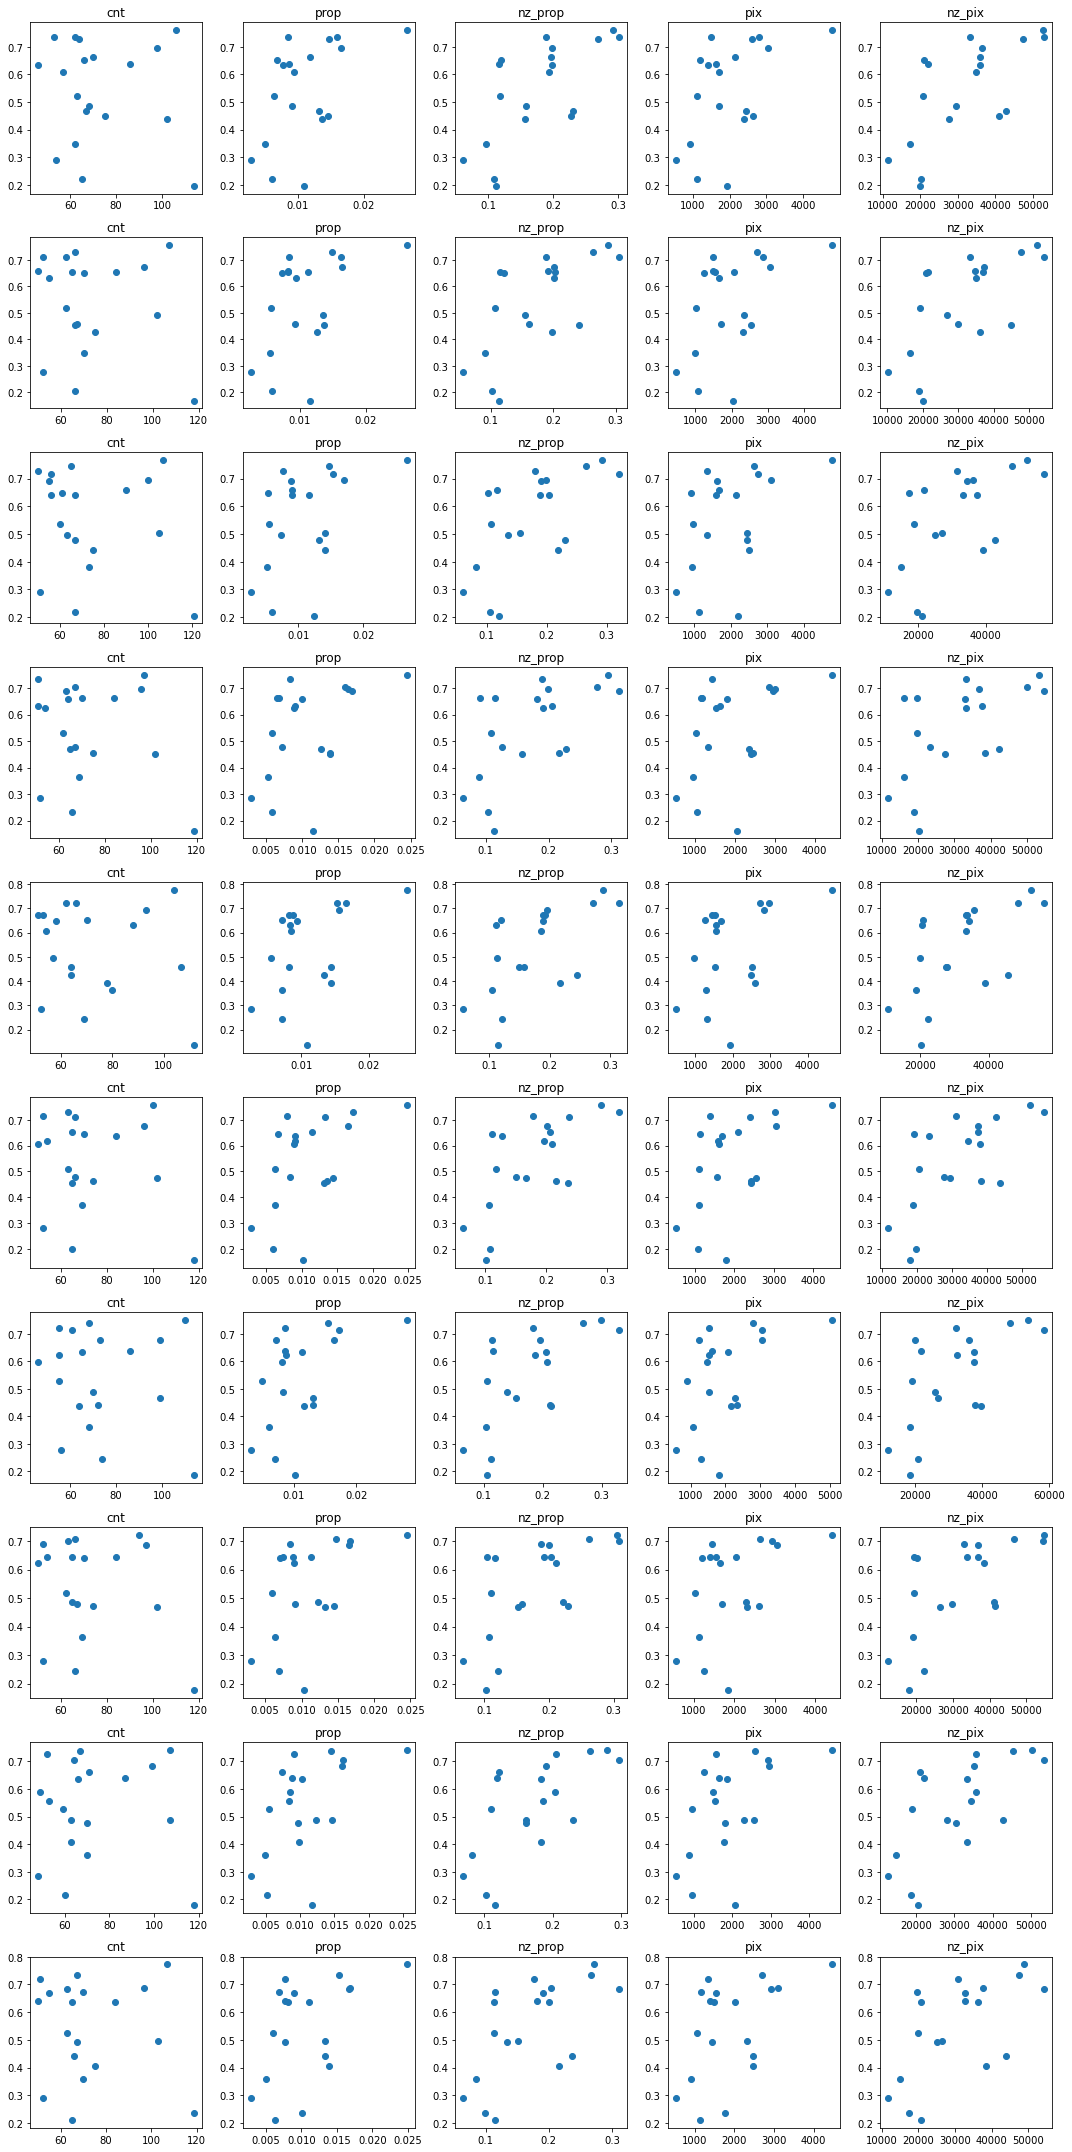

In [25]:
check_corr_df = result_df[(result_df.configs == 'FALSE_random_x2_FALSE_none') |
                          (result_df.configs == 'FALSE_mskf_x2_FALSE_none')]


label_cols = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor', 'background']

label_cols = [i for i in label_cols if (i != 'background') and (i != 'person')]

cnt_cols = [f'{i}_cnt' for i in label_cols]
prop_cols = [f'{i}_prop' for i in label_cols]
nz_prop_cols = [f'{i}_nz_prop' for i in label_cols]
pixel_cols = [f'{i}_pix' for i in label_cols]
nz_pixel_cols = [f'{i}_nz_pix' for i in label_cols]


cols_group = [cnt_cols, 
                prop_cols, 
                nz_prop_cols, 
                pixel_cols,
                nz_pixel_cols]

result = []

dummy_cnt = 1

fig = plt.figure(figsize=(15, 30))

for i in range(len(check_corr_df)):
    for cols in cols_group:
        col_name = '_'.join(cols[0].split('_')[1:])
        x = check_corr_df[cols].iloc[i].values
        y = check_corr_df[label_cols].iloc[i].values
        rho_p, pval_p = stats.pearsonr(x,y)
        rho_s, pval_s = stats.spearmanr(x,y)
        rho_k, pval_k = stats.kendalltau(x,y)
        result.append([col_name, i, rho_p, pval_p, rho_s, pval_s, rho_k, pval_k, x, y ])
        
        ax = fig.add_subplot(10,5,dummy_cnt)
        ax.scatter(x,y)
        ax.set_title(col_name)
        
        dummy_cnt +=1
plt.tight_layout()

corr_df = pd.DataFrame(result)
corr_df.columns = ['stat_name', 'random_state', 'rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k', 'class_data_stat', 'class_IoU']
display(corr_df.groupby('stat_name')[['rho_p', 'pval_p', 'rho_s', 'pval_s', 'rho_k', 'pval_k']].mean())




- http://www.statstutor.ac.uk/resources/uploaded/tutorsquickguidetostatistics.pdf

- https://statools.tistory.com/160


- Wilcoxon rank-sum does not handle ties between measurements in x and y. For tie handling check Mann-Whitney U rank test.
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html